**Library Imports**

In [67]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [68]:
import os
import sys
print(sys.version)   # Python version information

3.4.4 |Anaconda 2.4.0 (64-bit)| (default, Jan 11 2016, 13:54:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [69]:
from sympy import *  # Symbolic mathematics
import sympy

In [70]:
import numpy as np   # N-Dimensional arrays and numerical routines
import pandas as pd  # Data structures and data analysis tools
import scipy         # Numerical routines

In [71]:
#import numba        # Decorators for speeding up python functions

In [72]:
#from astropy import constants  # Physical Constants
#from astropy import units      # Physical Units

In [73]:
import matplotlib as mpl  # Standard plotting library
import matplotlib.pyplot as plt 
import seaborn as sns     # Statistical plotting and improved plot style
#import bokeh             # Interactive visualization library

In [74]:
from sympy.utilities.autowrap import ufuncify  # Creates numerical methods 
                                               # from symbolic expressions

In [75]:
from sympy import abc       # Symbolic variables
from sympy import pi as Pi  # Symbolic pi
from sympy import I as I    # Symbolic imaginary unit

**Display**

In [76]:
from IPython.display import display

In [77]:
from IPython.display import set_matplotlib_formats  
set_matplotlib_formats('pdf', 'png')

In [78]:
import ipywidgets

**Settings & Options**

In [79]:
np.set_printoptions(precision=5, threshold=100, edgeitems=3, linewidth=75, 
                    suppress=False, nanstr=None, infstr=None, 
                    formatter=None)

In [80]:
pandas_options = {'display.chop_threshold': None,
                  'display.precision': 4,
                  'display.max_columns': 8,
                  'display.max_rows': 8,
                  'display.max_info_columns': 8,
                  'display.max_info_rows': 8}
for key, val in pandas_options.items():
    pd.set_option(key, val)

In [81]:
sympy.interactive.printing.init_printing(use_latex='mathjax')

In [82]:
# os.system('ipython nbconvert --to pdf {filename}.ipynb')

**Custom functions**

In [83]:
latex_path = os.path.join(os.getcwd(), 'latex', 'figures')
def figure_path(fname): 
    return os.path.join(latex_path, fname)
print(os.getcwd())

/home/jaan/Dropbox/Projects/Crowd-Dynamics/documentation/notebooks


**Resources**

- [Simulating dynamical features of escape panic](http://www.nature.com/nature/journal/v407/n6803/full/407487a0.html)

- [Patient and impatient pedestrians in a spatial game for egress congestion](http://journals.aps.org/pre/abstract/10.1103/PhysRevE.87.012802)

- [Power Law](http://motion.cs.umn.edu/PowerLaw/)

- [Universal Power Law Governing Pedestrian Interactions](http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.113.238701)


# Linear Wall

In [84]:
linear_params = np.array(
    (
        ((0, 0), (0, 100)),
        ((0, 0), (100, 0)),
        ((0, 100), (100, 100)),
        ((100, 0), (100, 47)),
        ((100, 53), (100, 100)),
    ),
    dtype=np.float64
)

In [86]:
linear_params.shape

(5, 2, 2)

In [101]:
arr = linear_params[:, :, 0]

In [102]:
arr2 = linear_params[:, :, 1]

In [108]:
arr, arr2

(array([[   0.,    0.],
        [   0.,  100.],
        [   0.,  100.],
        [ 100.,  100.],
        [ 100.,  100.]]), array([[   0.,  100.],
        [   0.,    0.],
        [ 100.,  100.],
        [   0.,   47.],
        [  53.,  100.]]))

In [100]:
%matplotlib inline

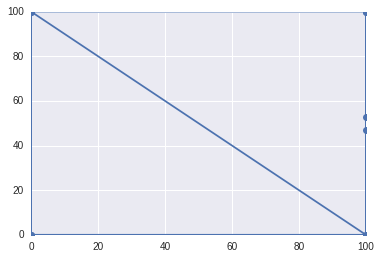

In [105]:
plt.plot(arr.flatten(), arr2.flatten(), marker='o')

# Scratch

In [ ]:
%matplotlib inline

In [ ]:
arr = np.random.normal(loc=0.22, scale=0.01, size=100)
arr

In [ ]:
arr = np.random.normal(loc=70, scale=10,size=100)
arr

In [ ]:
arr -= arr.min()

In [ ]:
arr /= arr.max()

In [ ]:
plt.hist(arr, bins=10);

In [ ]:
arr.sort()

In [ ]:
plt.plot(np.arange(arr.size), arr);

# Numba

In [ ]:
import numba

In [ ]:
@numba.jit(nopython=True, nogil=True)
def rotate90(vec2d):
    """
    90 degree counterclockwise rotation for 2D vector.

    (x, y) -> (-y, x)

    https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions
    """
    rot = np.zeros_like(vec2d)
    rot[0] = -vec2d[1]
    rot[1] = vec2d[0]
    return rot


@numba.jit(nopython=True, nogil=True)
def rotate270(vec2d):
    """
    90 degree clockwise rotation for 2D vector.
    
    (x, y) -> (y, -x)

    https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions
    """
    rot = np.zeros_like(vec2d)
    rot[0] = vec2d[1]
    rot[1] = -vec2d[0]
    return rot


In [ ]:
arr = np.random.uniform(size=2)

In [ ]:
arr

In [ ]:
rotate90(arr)

In [ ]:
arr.__len__()

In [ ]:
%timeit arr / np.hypot(arr[0], arr[1])

In [ ]:
eps = sys.float_info.epsilon

In [ ]:
np.sqrt(eps)

In [ ]:
np.isclose(0, eps)

In [ ]:
arr = np.random.uniform(size=20).reshape((10, 2))

In [ ]:
arr

In [ ]:
np.hypot(arr[0], arr[1])

In [ ]:
np.hypot(arr[:, 0], arr[:, 1])

In [ ]:
np.hypot(*arr.T)

In [ ]:
arr / np.hypot(arr[:, 0], arr[:, 1]).reshape((len(arr), 1))